<a href="https://colab.research.google.com/github/mjadric/AIHealth/blob/main/AIHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Učitajte podatke za trening
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [ ]:
test_data

,Unnamed: 0,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,...,Q,R,S,T,U,Y,Z,Label,Probability_0,Probability_1
0,0,I,Elektivni,3293,4,48-52,M,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,I,Elektivni,-8,24,38-42,Ž,1,0,3100400,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2,I,Elektivni,186,1,58-62,Ž,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,3,I,Elektivni,43,4,68-72,M,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,4,I,Elektivni,5793,1,73-77,M,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,7331,I,Elektivni,4623,1,78-82,M,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN
7332,7332,I,Elektivni,5122,2,63-67,M,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN
7333,7333,I,Elektivni,-8,10,68-72,Ž,1,0,3100400,...,0,0,0,0,0,0,1,NaN,NaN,NaN
7334,7334,I,Elektivni,40,2,73-77,M,0,0,3010100,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
train_data.head()

,Unnamed: 0,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,...,L,M,N,Q,R,S,T,U,Y,Z
0,1,I,Elektivni,-8,1,83-87,Ž,0,0,3010100,...,0,0,0,0,0,0,0,0,0,2
1,2,I,Elektivni,-8,16,68-72,M,1,0,3100400,...,0,0,0,0,0,0,0,0,0,0
2,3,I,Elektivni,279,3,18-22,Ž,1,0,3010100,...,0,0,0,0,0,0,0,0,0,0
3,4,I,Elektivni,1905,2,83-87,M,0,0,3010100,...,0,0,1,0,0,0,0,0,0,0
4,5,I,Elektivni,-8,2,73-77,M,0,0,3010100,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_data.shape

(28587, 275)

In [ ]:
print(train_data.columns.tolist())

['Unnamed: 0', 'AdmissionDx', 'AdmissionType', 'PreviousAdmissionDays', 'LOS', 'Age_Group', 'Gender', 'Surgery_Count', 'LOS_ICU', 'Discharge_Specialty', 'Dx_Discharge', 'Discharge_Status', 'Weight_Discharge', 'Height_Discharge', 'Education', 'Current_Work_Status', 'Label', 'acarbose_count', 'acetylsalicylic_acid_count', 'aciclovir_count', 'albumin_count', 'allopurinol_count', 'alprazolam_count', 'alprostadil_count', 'aminophylline_count', 'amiodarone_count', 'amlodipine_count', 'amoxicillin_count', 'amoxicillin_and_betalactamase_inhibitor_count', 'ampicillin_count', 'ampicillin_and_betalactamase_inhibitor_count', 'apixaban_count', 'atenolol_count', 'atorvastatin_count', 'atropine_count', 'azithromycin_count', 'b03aa07_count', 'benzathine_benzylpenicillin_count', 'betamethasone_count', 'bisoprolol_count', 'bromazepam_count', 'butylscopolamine_count', 'calcium_chloride_count', 'carbamazepine_count', 'carbohydrates_count', 'carvedilol_count', 'cefalexin_count', 'cefazolin_count', 'cefepim

In [ ]:
unique_labels = train_data['Label'].unique()
print(unique_labels)

label_counts = train_data['Label'].value_counts()
print(label_counts)

[0 1]
0    26697
1     1890
Name: Label, dtype: int64


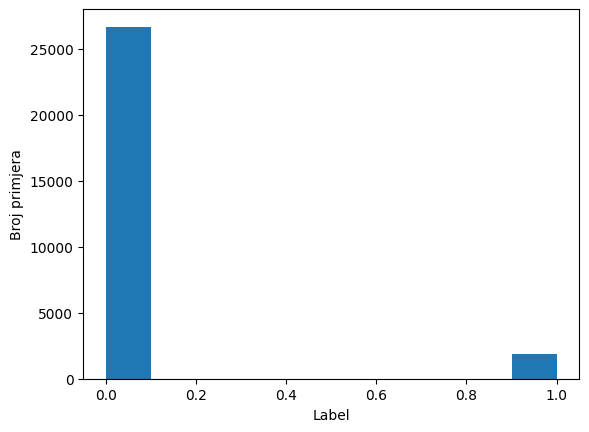

In [ ]:
plt.hist(train_data['Label'])
plt.xlabel('Label')
plt.ylabel('Broj primjera')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Definirajte značajke (X) i ciljnu varijablu (y)
X = train_data.drop(columns=["Label"])  # Uklonite ciljnu varijablu
y = train_data["Label"]

# Pretvorba kategoričkih varijabli u binarne (dummy) varijable
X_encoded = pd.get_dummies(X)

# Inicijalizacija i fitiranje Random Forest klasifikatora
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_encoded, y)



# Dobijte važnosti značajki
feature_importances = rf_classifier.feature_importances_

# Sortirajte značajke prema važnosti
sorted_indices = feature_importances.argsort()[::-1]

# Ispisujemo 50 najvažnijih značajki
n_top_features = 50
print("Najvažnije značajke:")
for i in range(n_top_features):
    feature_index = sorted_indices[i]
    feature_name = X_encoded.columns[feature_index]
    importance_score = feature_importances[feature_index]
    print(f"{i+1}. {feature_name}: {importance_score}")




Najvažnije značajke:
1. Unnamed: 0: 0.4578959473093381
2. PreviousAdmissionDays: 0.039006307268455415
3. Weight_Discharge: 0.02600016502624598
4. Height_Discharge: 0.024470842785858843
5. I: 0.019047296814699532
6. LOS: 0.01691256033907909
7. electrolytes_count: 0.01167788229701889
8. x99nijenavedenowho_count: 0.009447801204299602
9. E: 0.00852995160142327
10. diazepam_count: 0.007706556955665706
11. pantoprazole_count: 0.007411830963544018
12. enoxaparin_count: 0.0066059834542580124
13. bisoprolol_count: 0.006491717506598065
14. Discharge_Status_KUĆI: 0.006465581680893977
15. clopidogrel_count: 0.006455733952713597
16. heparin_count: 0.00633812212908943
17. furosemide_count: 0.006291209903470466
18. Discharge_Status_U DRUGU STACIONARNU ZDRAVSTVENU USTANOVU : 0.006234170752827463
19. Education_ZAVRŠENA SREDNJA ŠKOLA: 0.00612778964941222
20. Z: 0.006015708558181318
21. lidocaine_count: 0.005919127246351451
22. verapamil_count: 0.005834169694153437
23. iohexol_count: 0.005792485366109211

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Izračunajte korelaciju između značajki
correlation_matrix = train_data.corr()

# Izračunajte apsolutne vrijednosti korelacije između značajki i ciljne varijable
correlation_with_target = correlation_matrix['Label'].abs().sort_values(ascending=False)

# Odaberite 20 značajki s najvećim apsolutnim vrijednostima korelacije
top_50_features = correlation_with_target[1:51]  # Preskačemo prvu vrijednost jer je to korelacija sa samom sobom

# Ispisujemo 20 najvažnijih značajki
print("50 najvažnijih značajki:")
print(top_50_features)



<ipython-input-11-4be85d8f194d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


50 najvažnijih značajki:
Unnamed: 0                                      0.691190
PreviousAdmissionDays                           0.140805
Z                                               0.068380
warfarin_count                                  0.043858
Surgery_Count                                   0.043199
I                                               0.041599
midazolam_count                                 0.038899
valproic_acid_count                             0.035018
cefazolin_count                                 0.033295
tramadol_and_paracetamol_count                  0.032448
fentanyl_count                                  0.031396
protamine_count                                 0.031085
ticagrelor_count                                0.030317
propofol_count                                  0.029135
ampicillin_and_betalactamase_inhibitor_count    0.028911
lidocaine_count                                 0.028646
cefepime_count                                  0.027463
rocuro

#PREELIMINARNO STROJNO UČENJE


In [ ]:
# Učitajte podatke za trening
train_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [ ]:
import pandas as pd

# Učitajte podatke za trening
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Popis stupaca u oba skupa podataka
train_columns = set(train_data.columns)
test_columns = set(test_data.columns)

# Pronađite razlike između skupova stupaca
different_columns_train = train_columns - test_columns
different_columns_test = test_columns - train_columns

In [ ]:
# Prikazuje sve jedinstvene vrijednosti u stupcu 'Probability_1'
unique_values = test_data['Probability_0'].unique()

# Ispišite jedinstvene vrijednosti
print(unique_values)

[nan]


In [ ]:
print(different_columns_train)
print(different_columns_test)

set()
{'Probability_1', 'Probability_0'}


In [ ]:
train_data

In [ ]:
test_data.shape

(7336, 277)

In [ ]:
train_data.head()


,Unnamed: 0,AdmissionDx,AdmissionType,PreviousAdmissionDays,LOS,Age_Group,Gender,Surgery_Count,LOS_ICU,Discharge_Specialty,...,L,M,N,Q,R,S,T,U,Y,Z
0,1,I,Elektivni,-8,1,83-87,Ž,0,0,3010100,...,0,0,0,0,0,0,0,0,0,2
1,2,I,Elektivni,-8,16,68-72,M,1,0,3100400,...,0,0,0,0,0,0,0,0,0,0
2,3,I,Elektivni,279,3,18-22,Ž,1,0,3010100,...,0,0,0,0,0,0,0,0,0,0
3,4,I,Elektivni,1905,2,83-87,M,0,0,3010100,...,0,0,1,0,0,0,0,0,0,0
4,5,I,Elektivni,-8,2,73-77,M,0,0,3010100,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Provjera nedostajućih vrijednosti
missing_values = train_data.isnull().sum()

# Ako postoje nedostajuće vrijednosti, možete ih popuniti na primjer srednjom vrijednošću
train_data_filled = train_data.fillna(train_data.mean())


<ipython-input-56-de44e62f07c1>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data_filled = train_data.fillna(train_data.mean())


In [ ]:
# Koristite one-hot encoding za kategoričke varijable
train_data_encoded = pd.get_dummies(train_data_filled, columns=['AdmissionDx', 'AdmissionType', 'Age_Group', 'Gender'])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicijalizacija skalera
scaler = StandardScaler()

# Skaliranje numeričkih varijabli
numerical_columns = ['PreviousAdmissionDays', 'LOS', 'Surgery_Count', 'LOS_ICU']  # Dodajte sve numeričke stupce
train_data_encoded[numerical_columns] = scaler.fit_transform(train_data_encoded[numerical_columns])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Podijeli podatke na skup za učenje i skup za testiranje
X = train_data_encoded.drop('Label', axis=1)
y = train_data_encoded['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kodiranje kategoričkih varijabli pomoću one-hot encodinga
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Poravnajte skupove za učenje i testiranje po stupcima
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Inicijalizacija i treniranje modela logističke regresije
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Predikcija na skupu za testiranje
predictions = model.predict(X_test_encoded)

# Evaluacija performansi modela
accuracy = accuracy_score(y_test, predictions)
print("Točnost modela:", accuracy)



Točnost modela: 0.9730675061210213


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Inicijalizacija i treniranje modela stabla odlučivanja
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_encoded, y_train)

# Predikcija na skupu za testiranje
predictions_dt = decision_tree_model.predict(X_test_encoded)

# Evaluacija performansi modela stabla odlučivanja
accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Točnost modela stabla odlučivanja:", accuracy_dt)


Točnost modela stabla odlučivanja: 0.9606505771248688


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inicijalizacija i treniranje modela slučajnih šuma
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_encoded, y_train)

# Predikcija na skupu za testiranje
predictions_rf = random_forest_model.predict(X_test_encoded)

# Evaluacija performansi modela slučajnih šuma
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Točnost modela slučajnih šuma:", accuracy_rf)


Točnost modela slučajnih šuma: 0.9760405736271424


In [ ]:
from sklearn.svm import SVC

# Inicijalizacija i treniranje modela potpornih vektora
svm_model = SVC()
svm_model.fit(X_train_encoded, y_train)

# Predikcija na skupu za testiranje
predictions_svm = svm_model.predict(X_test_encoded)

# Evaluacija performansi modela potpornih vektora
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Točnost modela potpornih vektora:", accuracy_svm)


Točnost modela potpornih vektora: 0.9611752360965372


Moja pretpostavka za testni skup... na temelju rezultata iz target varijable Label..pretpostavljam da je to target je li hospitaliziran ili ne..

Na temelju rezultata strojnog učenja...ono što smo dobili u predictions_rf...(tako za svaki algoritam)...napraviti dva stupca Probability_0 i Probability_1 koju ćemo popunjavati 0 i 1 ovisno o hospitalizaciji a na temelju rezultata predictions